In [56]:
import gurobipy as gp
from gurobipy import GRB
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.axes import Axes as ax

In [6]:
model = gp.Model("model")
ubx = 0                                   # Minimize F(x, y) := (x-1.5)**2 + (y + 1)**2 
lbx = 3                                   # subject to x in [0,3], x-y >= 1, x+y <= 2, -y <= 1, y <= 0
x = model.addVar(lbx, ubx, name = 'x')
y = model.addVar(name = 'y')
model.addConstr(x-y>= 1, name = '1st')
model.addConstr(x+y <= 2, name = '2nd')
model.addConstr(-y <= 1)
model.addConstr(y <= 0)
model.setObjective((x-1.5)*(x-1.5) + (y + 1)* (y + 1), GRB.MINIMIZE)

In [7]:
model.optimize()

Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 2 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 4 rows, 2 columns and 6 nonzeros
Model fingerprint: 0x79321340
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 3e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [3e+00, 3e+00]
  RHS range        [1e+00, 2e+00]
Presolve time: 0.12s

Barrier solved model in 0 iterations and 0.15 seconds
Model is infeasible or unbounded


In [8]:
# (x, y) = (1.5, -1) is an optimal solution and lies in the feasible region

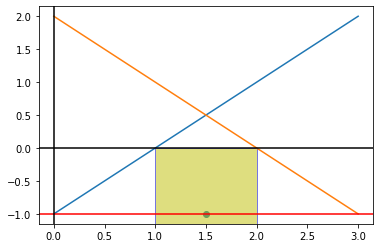

In [104]:
%matplotlib inline
x = np.linspace(0, 3)
y1 = x - 1
y2 = 2 - x
plt.plot(x, y1)
plt.plot(x, y2)
y3 = plt.axhline(y=0, color='black', linestyle='-')
y4 = plt.axhline(y=-1, color='r', linestyle='-')
plt.axvline(0, color='black')
plt.scatter(1.5, -1)
plt.axvspan( 1, 2, ymin = -0.5, ymax = 0.35 , ec = 'blue',color = 'y', alpha = 0.5)
plt.show()